In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [6]:
df = pd.read_csv("restaurant_data.csv")
print(df.head())
print(df.info())
print(df.describe())

  Cuisines  Average Cost for two  Aggregate rating
0  Italian                  25.0               4.5
1  Mexican                  30.0               4.0
2  Unknown                   NaN               3.0
3   Indian                  20.0               4.2
4  Chinese                  35.0               4.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cuisines              7 non-null      object 
 1   Average Cost for two  6 non-null      float64
 2   Aggregate rating      6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 300.0+ bytes
None
       Average Cost for two  Aggregate rating
count              6.000000          6.000000
mean              26.666667          4.100000
std                5.501515          0.613188
min               20.000000          3.000000
25%               22.750000          4.025000
5

In [15]:

df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  7 non-null      float64
 1   Aggregate rating      7 non-null      float64
 2   Cuisines_Indian       7 non-null      bool   
 3   Cuisines_Italian      7 non-null      bool   
 4   Cuisines_Mexican      7 non-null      bool   
 5   Cuisines_Unknown      7 non-null      bool   
dtypes: bool(4), float64(2)
memory usage: 272.0 bytes
None


/tmp/ipython-input-1080093188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)


In [23]:
X = df.drop("Aggregate rating", axis=1)
y = df["Aggregate rating"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [32]:
dt = DecisionTreeRegressor(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [33]:
# Linear Regression
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

# Decision Tree Regression
print("\nDecision Tree Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))

Linear Regression:
MSE: 2.2258024691358065
R²: -34.612839506172904

Decision Tree Regression:
MSE: 0.10000000000000017
R²: -0.6000000000000028


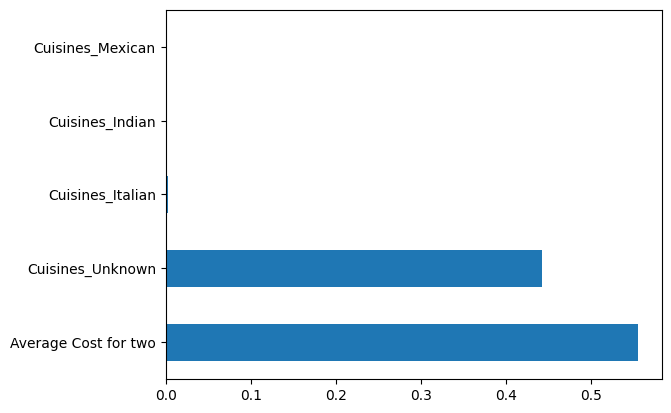

In [34]:
import matplotlib.pyplot as plt

importance = dt.feature_importances_
feat_importance = pd.Series(importance, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [35]:
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": lr.coef_})
print(coef_df.sort_values(by="Coefficient", ascending=False))

                Feature  Coefficient
3      Cuisines_Mexican     0.000000
0  Average Cost for two    -0.255556
2      Cuisines_Italian    -2.488889
4      Cuisines_Unknown    -3.972222
1       Cuisines_Indian    -4.433333
